# Project: Gun Background Checks and the Population

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The FBI releases the number of background checks and the reason for the check for each month of the year. The US Census Board also released the estimated population for 2016 and the census data for 2010.

The questions I intend to ask are:
- Has the number of background checks increased at the same rate as the population?
- Does population density have any effect on the number of background checks?
- Does the education level have any effect on the number of background checks?
- Does race have any effect on the number of background checks?
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
#loading gun and census data and then review it starting with the gun data.
gun_df = pd.read_csv('gun_data.csv')
census_df = pd.read_csv('U.S. Census Data.csv',index_col=0,header=None).T #switching so I can join on states

gun_df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [3]:
gun_df.shape

(12485, 27)

In [4]:
gun_df.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [5]:
gun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [6]:
gun_df.nunique()

month                          227
state                           55
permit                        5390
permit_recheck                 168
handgun                       7381
long_gun                      8350
other                         1226
multiple                      1387
admin                          499
prepawn_handgun                 90
prepawn_long_gun               133
prepawn_other                   16
redemption_handgun            1893
redemption_long_gun           2370
redemption_other                47
returned_handgun               237
returned_long_gun              113
returned_other                  34
rentals_handgun                  9
rentals_long_gun                 8
private_sale_handgun           152
private_sale_long_gun          136
private_sale_other              43
return_to_seller_handgun        17
return_to_seller_long_gun       17
return_to_seller_other           5
totals                       10218
dtype: int64

#### Background check analysis
For the questions I intend to ask, I only need to have the data from 2016 and 2010 for the 50 states (the 5 extras would be territories of the US). To this end, I will need to split the data into month and year and then sum total number of background checks by state and year. While the various types of background checks might be interesting to look at for future projects, I'm not going to use it for this one.

In [7]:
census_df.head()

,Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
1,Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Either no or too few sample observations were ...,Suppressed to avoid disclosure of confidential...,Fewer than 25 firms,Footnote on this item in place of data,Not available,Suppressed; does not meet publication standards,Not applicable,Value greater than zero but less than half uni...
2,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
census_df.shape

(51, 86)

In [9]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 51
Data columns (total 86 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   Fact                                                                                    51 non-null     object
 1   Population estimates, July 1, 2016,  (V2016)                                            50 non-null     object
 2   Population estimates base, April 1, 2010,  (V2016)                                      50 non-null     object
 3   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   50 non-null     object
 4   Population, Census, April 1, 2010                                                       50 non-null     object
 5   Persons under 5 years, percent, July 1, 2016,  (V2016)                          

In [10]:
census_df.drop(census_df.columns[66:], axis = 1, inplace=True)
census_df.head()

,Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
1,Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
3,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
4,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
5,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""


In [11]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 51
Data columns (total 66 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   Fact                                                                                    51 non-null     object
 1   Population estimates, July 1, 2016,  (V2016)                                            50 non-null     object
 2   Population estimates base, April 1, 2010,  (V2016)                                      50 non-null     object
 3   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   50 non-null     object
 4   Population, Census, April 1, 2010                                                       50 non-null     object
 5   Persons under 5 years, percent, July 1, 2016,  (V2016)                          

#### Census Data Analysis
I needed to transpose the data in the census data file so that the various facts were the features instead of the states. Some of the rows after the data contained notes on the resto of the data. After the transpose, I removed the rows (which had become columns).

I am only looking at population, race, education, and population density, will be removing the other columns also all of the numbers are strings, so I will need to clean these up.

#### Joining Data
I plan make the gun data set into a dataframe with 4 features; state, 2016 background checks, 2010 background checks, and the percent increase. Once that is created, I will join it with the features I'm using in the census data. Once that is complete, I will start the analysis.

### Data Cleaning

For the background check data, I'm only going to use the data from 2010 and 2016, and only the yearly totals. I need to split the month and year up so I can sum up the states for the years 2010 and 2016. Then for each state, there will be a total for the number of background checks for 2010, background checks for 2016, and the percent change

In [12]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
gun_df.drop(gun_df.columns[2:26], axis = 1, inplace = True)
gun_df.head()

,month,state,totals
0,2017-09,Alabama,32019
1,2017-09,Alaska,6303
2,2017-09,Arizona,28394
3,2017-09,Arkansas,17747
4,2017-09,California,123506


In [13]:
gun_df['year']=gun_df['month'].map(lambda x: x[0:4])
gun_df.head()

,month,state,totals,year
0,2017-09,Alabama,32019,2017
1,2017-09,Alaska,6303,2017
2,2017-09,Arizona,28394,2017
3,2017-09,Arkansas,17747,2017
4,2017-09,California,123506,2017


In [14]:
gun_df.drop(columns = ['month'], inplace = True)
gun_df.head()

,state,totals,year
0,Alabama,32019,2017
1,Alaska,6303,2017
2,Arizona,28394,2017
3,Arkansas,17747,2017
4,California,123506,2017


In [15]:
gun_2016_df = gun_df.groupby('year').get_group('2016')
gun_2016_df = gun_2016_df.drop(columns = ['year'])
gun_2016_df = gun_2016_df.groupby('state').sum()
gun_2016_df.rename(columns = {'totals': 'back_check_2016'}, inplace = True)
gun_2016_df.head()

,back_check_2016
state,
Alabama,616947
Alaska,87647
Arizona,416279
Arkansas,266014
California,2377167


In [16]:
gun_2010_df = gun_df.groupby('year').get_group('2010')
gun_2010_df = gun_2010_df.drop(columns = ['year'])
gun_2010_df = gun_2010_df.groupby('state').sum()
gun_2010_df.rename(columns = {'totals': 'back_check_2010'}, inplace = True)
gun_2010_df.head()

,back_check_2010
state,
Alabama,308607
Alaska,65909
Arizona,206050
Arkansas,191448
California,816399


In [17]:
gun_16_10_df = pd.merge(left = gun_2016_df, right = gun_2010_df, on = 'state')
gun_16_10_df.head()

,back_check_2016,back_check_2010
state,,
Alabama,616947,308607
Alaska,87647,65909
Arizona,416279,206050
Arkansas,266014,191448
California,2377167,816399


In [18]:
gun_16_10_df['back_check_change'] = (gun_16_10_df['back_check_2016']-gun_16_10_df['back_check_2010'])/gun_16_10_df['back_check_2010']
gun_16_10_df.head()

,back_check_2016,back_check_2010,back_check_change
state,,,
Alabama,616947,308607,0.999135
Alaska,87647,65909,0.329818
Arizona,416279,206050,1.020281
Arkansas,266014,191448,0.389484
California,2377167,816399,1.911771


In [19]:
gun_16_10_df.describe()

,back_check_2016,back_check_2010,back_check_change
count,5.500000e+01,5.500000e+01,55.000000
mean,4.986457e+05,2.603725e+05,inf
std,6.691289e+05,3.609865e+05,NaN
min,1.700000e+01,0.000000e+00,-0.466843
25%,1.117515e+05,6.453000e+04,0.571186
50%,2.761610e+05,1.795950e+05,0.772276
75%,6.072150e+05,3.324420e+05,1.043191
max,3.676847e+06,2.385579e+06,inf


Note: the inf is because one of the U.S. Territories did not have any background checks in 2010. This will be removed when I join this with the census data because the territories are not in that data set.

For the census data, I need to drop the unused columns, rename the columns, change the values to numbers, and create a few derived columns.

In [20]:
census_df.columns

Index(['Fact', 'Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 201

In [21]:
#easier to get the columns I want than drop the columns I don't want
census_df = census_df[['Fact', 'Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V2016)',
       'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
       'Two or More Races, percent, July 1, 2016,  (V2016)',
       'Hispanic or Latino, percent, July 1, 2016,  (V2016)',
       'White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)',
       'High school graduate or higher, percent of persons age 25 years+, 2011-2015',
       "Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015",
       'Land area in square miles, 2010']]
census_df.head()

,Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","Land area in square miles, 2010"
1,Fact Note,NaN,NaN,NaN,(a),(a),(a),(a),(a),NaN,(b),NaN,NaN,NaN,NaN
2,Alabama,"4,863,300","4,780,131",1.70%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,84.30%,23.50%,"50,645.33"
3,Alaska,"741,894","710,249",4.50%,66.10%,3.80%,15.20%,6.30%,1.30%,7.30%,7.00%,61.20%,92.10%,28.00%,"570,640.95"
4,Arizona,"6,931,071","6,392,301",8.40%,83.30%,4.90%,5.40%,3.40%,0.30%,2.80%,30.90%,55.50%,86.00%,27.50%,"113,594.08"
5,Arkansas,"2,988,248","2,916,025",2.50%,79.40%,15.70%,1.00%,1.60%,0.30%,2.00%,7.30%,72.90%,84.80%,21.10%,"52,035.48"


In [22]:
#That first row is bugging me and it will cause problems when I try to change things to numbers
census_df.drop(index = 1, inplace=True)
census_df.head()

,Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","Land area in square miles, 2010"
2,Alabama,"4,863,300","4,780,131",1.70%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,84.30%,23.50%,"50,645.33"
3,Alaska,"741,894","710,249",4.50%,66.10%,3.80%,15.20%,6.30%,1.30%,7.30%,7.00%,61.20%,92.10%,28.00%,"570,640.95"
4,Arizona,"6,931,071","6,392,301",8.40%,83.30%,4.90%,5.40%,3.40%,0.30%,2.80%,30.90%,55.50%,86.00%,27.50%,"113,594.08"
5,Arkansas,"2,988,248","2,916,025",2.50%,79.40%,15.70%,1.00%,1.60%,0.30%,2.00%,7.30%,72.90%,84.80%,21.10%,"52,035.48"
6,California,"39,250,017","37,254,522",5.40%,72.70%,6.50%,1.70%,14.80%,0.50%,3.80%,38.90%,37.70%,81.80%,31.40%,"155,779.22"


In [23]:
#Those names are far too long, but there's no way to automate reducing them so I'll need to do it manually.
census_df.rename(columns = {'Fact':'state', 'Population estimates, July 1, 2016,  (V2016)':'pop_2016',
       'Population estimates base, April 1, 2010,  (V2016)':'pop_2010',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)':'pop_change',
       'White alone, percent, July 1, 2016,  (V2016)':'white',
       'Black or African American alone, percent, July 1, 2016,  (V2016)':'black',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)':'nat_amer',
       'Asian alone, percent, July 1, 2016,  (V2016)':'asian',
       'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)':'pac_island',
       'Two or More Races, percent, July 1, 2016,  (V2016)':'multi_race',
       'Hispanic or Latino, percent, July 1, 2016,  (V2016)':'hisp',
       'White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)':'white_non_hisp',
       'High school graduate or higher, percent of persons age 25 years+, 2011-2015':'HS_grad',
       "Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015":'col_grad',
       'Land area in square miles, 2010':'area_sq_mi'}, inplace = True)
census_df.head()

,state,pop_2016,pop_2010,pop_change,white,black,nat_amer,asian,pac_island,multi_race,hisp,white_non_hisp,HS_grad,col_grad,area_sq_mi
2,Alabama,"4,863,300","4,780,131",1.70%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,84.30%,23.50%,"50,645.33"
3,Alaska,"741,894","710,249",4.50%,66.10%,3.80%,15.20%,6.30%,1.30%,7.30%,7.00%,61.20%,92.10%,28.00%,"570,640.95"
4,Arizona,"6,931,071","6,392,301",8.40%,83.30%,4.90%,5.40%,3.40%,0.30%,2.80%,30.90%,55.50%,86.00%,27.50%,"113,594.08"
5,Arkansas,"2,988,248","2,916,025",2.50%,79.40%,15.70%,1.00%,1.60%,0.30%,2.00%,7.30%,72.90%,84.80%,21.10%,"52,035.48"
6,California,"39,250,017","37,254,522",5.40%,72.70%,6.50%,1.70%,14.80%,0.50%,3.80%,38.90%,37.70%,81.80%,31.40%,"155,779.22"


In [24]:
def convert_to_number(num):
    num = str(num) #incase a number is sent
    num_clean = ''
    is_percent = False
    is_decimal = False
    
    for i in range(len(num)):
        if num[i].isnumeric():
            num_clean = num_clean + num[i]
        if num[i] == '.':
            num_clean = num_clean + num[i]
            is_decimal = True
        if num[i] == '%':
            is_percent = True
        if num[i] == '-':
            num_clean = num_clean + num[i]
    
    if num_clean == '':
        return(0)
    if is_percent:
        return(float(num_clean)/100)
    if is_decimal:
        return(float(num_clean))
    return(int(num_clean))

num_col = census_df.columns[1:]
for col in num_col:
    census_df[col] = census_df[col].map(convert_to_number)
census_df.head()

,state,pop_2016,pop_2010,pop_change,white,black,nat_amer,asian,pac_island,multi_race,hisp,white_non_hisp,HS_grad,col_grad,area_sq_mi
2,Alabama,4863300,4780131,0.017,0.693,0.268,0.007,0.014,0.001,0.016,0.042,0.658,0.843,0.235,50645.33
3,Alaska,741894,710249,0.045,0.661,0.038,0.152,0.063,0.013,0.073,0.070,0.612,0.921,0.280,570640.95
4,Arizona,6931071,6392301,0.084,0.833,0.049,0.054,0.034,0.003,0.028,0.309,0.555,0.860,0.275,113594.08
5,Arkansas,2988248,2916025,0.025,0.794,0.157,0.010,0.016,0.003,0.020,0.073,0.729,0.848,0.211,52035.48
6,California,39250017,37254522,0.054,0.727,0.065,0.017,0.148,0.005,0.038,0.389,0.377,0.818,0.314,155779.22


In [25]:
census_df.dtypes

0
state              object
pop_2016            int64
pop_2010            int64
pop_change        float64
white             float64
black             float64
nat_amer          float64
asian             float64
pac_island        float64
multi_race        float64
hisp              float64
white_non_hisp    float64
HS_grad           float64
col_grad          float64
area_sq_mi        float64
dtype: object

In [26]:
# HS grad includes college grad, so I'm going to change HS_grad to at most HS grad, also added a no HS for category
# I need population density instead of area so I'll get that too
census_df['HS_grad'] = census_df['HS_grad'] - census_df['col_grad']
census_df['no_HS'] = 1 - (census_df['HS_grad'] + census_df['col_grad'])
census_df['pop_dec'] = census_df['pop_2016']/census_df['area_sq_mi']
census_df.head()

,state,pop_2016,pop_2010,pop_change,white,black,nat_amer,asian,pac_island,multi_race,hisp,white_non_hisp,HS_grad,col_grad,area_sq_mi,no_HS,pop_dec
2,Alabama,4863300,4780131,0.017,0.693,0.268,0.007,0.014,0.001,0.016,0.042,0.658,0.608,0.235,50645.33,0.157,96.026623
3,Alaska,741894,710249,0.045,0.661,0.038,0.152,0.063,0.013,0.073,0.070,0.612,0.641,0.280,570640.95,0.079,1.300106
4,Arizona,6931071,6392301,0.084,0.833,0.049,0.054,0.034,0.003,0.028,0.309,0.555,0.585,0.275,113594.08,0.140,61.016129
5,Arkansas,2988248,2916025,0.025,0.794,0.157,0.010,0.016,0.003,0.020,0.073,0.729,0.637,0.211,52035.48,0.152,57.427125
6,California,39250017,37254522,0.054,0.727,0.065,0.017,0.148,0.005,0.038,0.389,0.377,0.504,0.314,155779.22,0.182,251.959260


Now joining the data together, each of the 50 states has one line in each. 

Unfortunately, comparing the number of background checks aren't that helpful in themselves. Just a quick look you can see that the population of Alaska is about 700 thousand and California is 39 million, so there should be more background checks in California than Alaska. To overcome this, columns for the background checks per 1,000 people level this out.

In [27]:
combined_df = pd.merge(left=gun_16_10_df, right=census_df, on='state')
combined_df.head()

,state,back_check_2016,back_check_2010,back_check_change,pop_2016,pop_2010,pop_change,white,black,nat_amer,asian,pac_island,multi_race,hisp,white_non_hisp,HS_grad,col_grad,area_sq_mi,no_HS,pop_dec
0,Alabama,616947,308607,0.999135,4863300,4780131,0.017,0.693,0.268,0.007,0.014,0.001,0.016,0.042,0.658,0.608,0.235,50645.33,0.157,96.026623
1,Alaska,87647,65909,0.329818,741894,710249,0.045,0.661,0.038,0.152,0.063,0.013,0.073,0.070,0.612,0.641,0.280,570640.95,0.079,1.300106
2,Arizona,416279,206050,1.020281,6931071,6392301,0.084,0.833,0.049,0.054,0.034,0.003,0.028,0.309,0.555,0.585,0.275,113594.08,0.140,61.016129
3,Arkansas,266014,191448,0.389484,2988248,2916025,0.025,0.794,0.157,0.010,0.016,0.003,0.020,0.073,0.729,0.637,0.211,52035.48,0.152,57.427125
4,California,2377167,816399,1.911771,39250017,37254522,0.054,0.727,0.065,0.017,0.148,0.005,0.038,0.389,0.377,0.504,0.314,155779.22,0.182,251.959260


In [28]:
# and one last thing to see the background checks per thousand people
combined_df['bc_per_thou_2016'] = combined_df['back_check_2016']/combined_df['pop_2016'] * 1000
combined_df['bc_per_thou_2010'] = combined_df['back_check_2010']/combined_df['pop_2010'] * 1000
combined_df['bc_per_thou_change'] = (combined_df['bc_per_thou_2016']-combined_df['bc_per_thou_2010'])/combined_df['bc_per_thou_2010']
combined_df.head()

,state,back_check_2016,back_check_2010,back_check_change,pop_2016,pop_2010,pop_change,white,black,nat_amer,...,hisp,white_non_hisp,HS_grad,col_grad,area_sq_mi,no_HS,pop_dec,bc_per_thou_2016,bc_per_thou_2010,bc_per_thou_change
0,Alabama,616947,308607,0.999135,4863300,4780131,0.017,0.693,0.268,0.007,...,0.042,0.658,0.608,0.235,50645.33,0.157,96.026623,126.857689,64.560365,0.964947
1,Alaska,87647,65909,0.329818,741894,710249,0.045,0.661,0.038,0.152,...,0.070,0.612,0.641,0.280,570640.95,0.079,1.300106,118.139519,92.797033,0.273096
2,Arizona,416279,206050,1.020281,6931071,6392301,0.084,0.833,0.049,0.054,...,0.309,0.555,0.585,0.275,113594.08,0.140,61.016129,60.059838,32.234089,0.863240
3,Arkansas,266014,191448,0.389484,2988248,2916025,0.025,0.794,0.157,0.010,...,0.073,0.729,0.637,0.211,52035.48,0.152,57.427125,89.020055,65.653758,0.355902
4,California,2377167,816399,1.911771,39250017,37254522,0.054,0.727,0.065,0.017,...,0.389,0.377,0.504,0.314,155779.22,0.182,251.959260,60.564738,21.914091,1.763735


In [29]:
combined_df.shape

(50, 23)

In [30]:
combined_df.dtypes

state                  object
back_check_2016         int64
back_check_2010         int64
back_check_change     float64
pop_2016                int64
pop_2010                int64
pop_change            float64
white                 float64
black                 float64
nat_amer              float64
asian                 float64
pac_island            float64
multi_race            float64
hisp                  float64
white_non_hisp        float64
HS_grad               float64
col_grad              float64
area_sq_mi            float64
no_HS                 float64
pop_dec               float64
bc_per_thou_2016      float64
bc_per_thou_2010      float64
bc_per_thou_change    float64
dtype: object

In [31]:
combined_df.describe()

,back_check_2016,back_check_2010,back_check_change,pop_2016,pop_2010,pop_change,white,black,nat_amer,asian,...,hisp,white_non_hisp,HS_grad,col_grad,area_sq_mi,no_HS,pop_dec,bc_per_thou_2016,bc_per_thou_2010,bc_per_thou_change
count,5.000000e+01,5.000000e+01,50.000000,5.000000e+01,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.00000,...,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,5.481110e+05,2.861985e+05,0.866854,6.448927e+06,6.163127e+06,0.041800,0.793080,0.110240,0.019980,0.04342,...,0.11714,0.693200,0.592120,0.29012,70636.887800,0.117760,200.979545,97.695094,60.124768,0.795730
std,6.826073e+05,3.689456e+05,0.561458,7.271769e+06,6.848463e+06,0.033811,0.123359,0.096319,0.030651,0.05562,...,0.10326,0.156635,0.044498,0.04934,85815.678218,0.030896,266.069896,111.927836,76.912048,0.548951
min,1.668100e+04,1.053300e+04,-0.466843,5.855010e+05,5.637670e+05,-0.012000,0.258000,0.006000,0.002000,0.00800,...,0.01500,0.221000,0.493000,0.19200,1033.810000,0.072000,1.300106,11.676818,5.746391,-0.517050
25%,1.500798e+05,8.912925e+04,0.564935,1.850106e+06,1.833003e+06,0.016250,0.724750,0.036250,0.005000,0.01725,...,0.05000,0.595500,0.568000,0.25950,36741.167500,0.091500,45.741897,60.871917,34.287345,0.515299
50%,3.212000e+05,1.931225e+05,0.762840,4.559320e+06,4.436412e+06,0.040500,0.821000,0.082000,0.007500,0.02850,...,0.09200,0.729500,0.601500,0.28200,53891.280000,0.111500,106.679929,83.752972,49.772249,0.658230
75%,6.159565e+05,3.348182e+05,0.999006,7.198768e+06,6.680362e+06,0.063750,0.875000,0.155250,0.016000,0.04775,...,0.13550,0.803750,0.627750,0.31775,81225.725000,0.144000,220.071813,102.325635,60.495859,0.873300
max,3.676847e+06,2.385579e+06,3.156589,3.925002e+07,3.725452e+07,0.127000,0.948000,0.377000,0.152000,0.37700,...,0.48500,0.935000,0.666000,0.40500,570640.950000,0.182000,1216.236256,828.683468,549.755677,3.063271


<a id='eda'></a>
## Exploratory Data Analysis

### Does the change in state's population correlate to the change in the number of background checks?

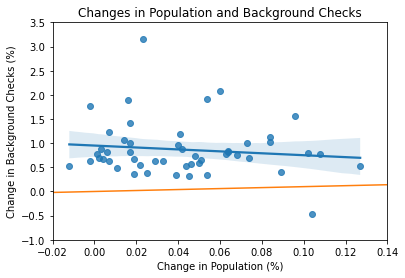

In [32]:
sns.regplot(x='pop_change', y='back_check_change', data = combined_df)
plt.plot([-1, 0, 1, 2], [-1, 0, 1, 2])
plt.xlabel("Change in Population (%)")
plt.ylabel("Change in Background Checks (%)")
plt.title("Changes in Population and Background Checks")
plt.axis([-0.02, 0.14, -1, 3.5])
plt.show()

In [33]:
m, b, r, p, std_err = stats.linregress(combined_df['pop_change'], combined_df['back_check_change'])
print('Regression Line: y = ' + str(round(m,4)) + 'x + ' + str(round(b,4)) + ' r = ' + str(round(r,4)))

Regression Line: y = -1.9966x + 0.9503 r = -0.1202


It appears that there is a slight negative correlation between the change in population between 2010 and 2016 and the change in the number of background checks. So as the population increased more, the number of background checks increased less. The regression line is shown in blue.

The line y = x is shown in orange. All but one data point are above this line. This means the number of background checks is increasing at a much higher rate than the population itself.

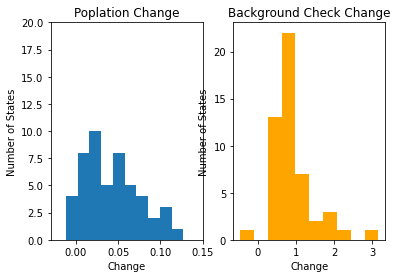

In [34]:
plt.subplot(121)
plt.hist(combined_df['pop_change'])
plt.axis([-0.03,0.15,0,20])
plt.title('Poplation Change')
plt.ylabel('Number of States')
plt.xlabel('Change')

plt.subplot(122)
plt.hist(combined_df['back_check_change'], color = 'orange')
plt.title('Background Check Change')
plt.ylabel('Number of States')
plt.xlabel('Change')

plt.show()

As the histograms show, the percent increase in population for all states is less than 15%, yet the background checks have many states seeing over a 100% increase.

### Does population density, educational level, or race have any correlation to the number of background checks?

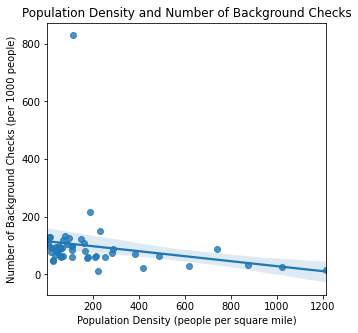

In [35]:
# population density
plt.figure(figsize = (5,5))
sns.regplot(x='pop_dec', y='bc_per_thou_2016', data = combined_df)
plt.xlabel("Population Density (people per square mile)")
plt.ylabel("Number of Background Checks (per 1000 people)")
plt.title("Population Density and Number of Background Checks")
plt.show()

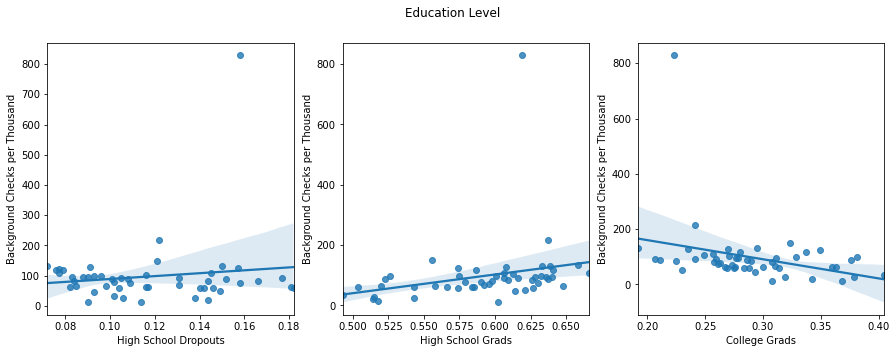

In [36]:
#Education
plt.figure(figsize = (15,5))

plt.subplot(131)
sns.regplot(x = 'no_HS', y = 'bc_per_thou_2016', data = combined_df)
plt.xlabel('High School Dropouts')
plt.ylabel('Background Checks per Thousand')

plt.subplot(132)
sns.regplot(x = 'HS_grad', y = 'bc_per_thou_2016', data = combined_df)
plt.xlabel('High School Grads')
plt.ylabel('Background Checks per Thousand')

plt.subplot(133)
sns.regplot(x = 'col_grad', y = 'bc_per_thou_2016', data = combined_df)
plt.xlabel('College Grads')
plt.ylabel('Background Checks per Thousand')

plt.suptitle('Education Level')
plt.show()

For race, I'm only using White, Black, Asian, and Hispanic. The other races listed are typically a very small percentage so will probably not make much difference the number of background checks.

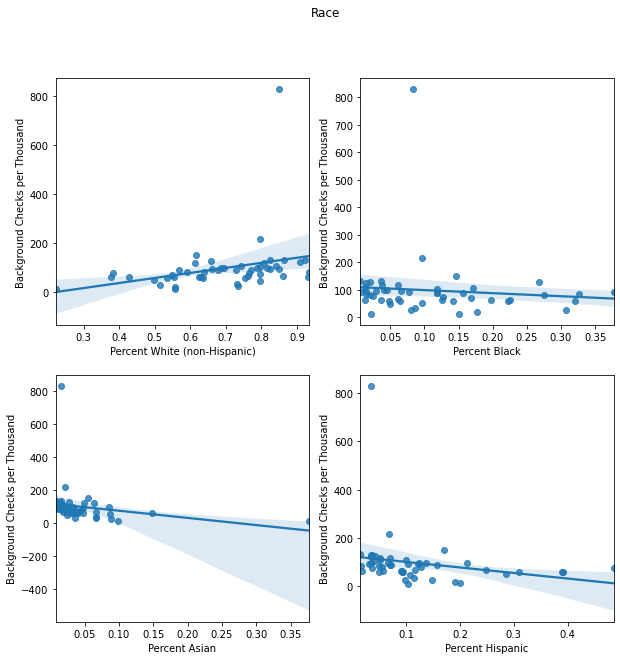

In [37]:
#Race
plt.figure(figsize = (10,10))

plt.subplot(221)
sns.regplot(x = 'white_non_hisp', y = 'bc_per_thou_2016', data = combined_df)
plt.xlabel('Percent White (non-Hispanic)')
plt.ylabel('Background Checks per Thousand')

plt.subplot(222)
sns.regplot(x = 'black', y = 'bc_per_thou_2016', data = combined_df)
plt.xlabel('Percent Black')
plt.ylabel('Background Checks per Thousand')

plt.subplot(223)
sns.regplot(x = 'asian', y = 'bc_per_thou_2016', data = combined_df)
plt.xlabel('Percent Asian')
plt.ylabel('Background Checks per Thousand')

plt.subplot(224)
sns.regplot(x = 'hisp', y = 'bc_per_thou_2016', data = combined_df)
plt.xlabel('Percent Hispanic')
plt.ylabel('Background Checks per Thousand')

plt.suptitle('Race')
plt.show()

It appears that the number of background checks have a negative linear correlation with population density. Also, graduating only high school has a positive correlation with the number of background check and graduating college seems to have a negative correlation. Finally, it appears that only race with a positive correlation are Whites and the rest are negative.

But there's one state with more than 800 background checks per thousand people (turns out to be Kentucky). Let's check what happens to these graphs if that row is removed from the set.

In [38]:
reduced_df = combined_df.drop(index =combined_df.index[combined_df['bc_per_thou_2016'] == combined_df['bc_per_thou_2016'].max()])
reduced_df.shape

(49, 23)

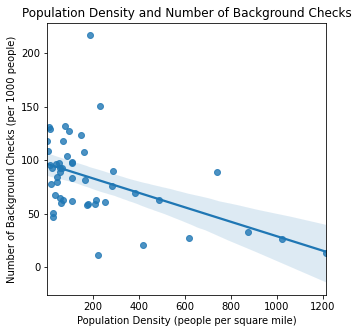

In [39]:
# population density
plt.figure(figsize = (5,5))
sns.regplot(x='pop_dec', y='bc_per_thou_2016', data = reduced_df)
plt.xlabel("Population Density (people per square mile)")
plt.ylabel("Number of Background Checks (per 1000 people)")
plt.title("Population Density and Number of Background Checks")
plt.show()

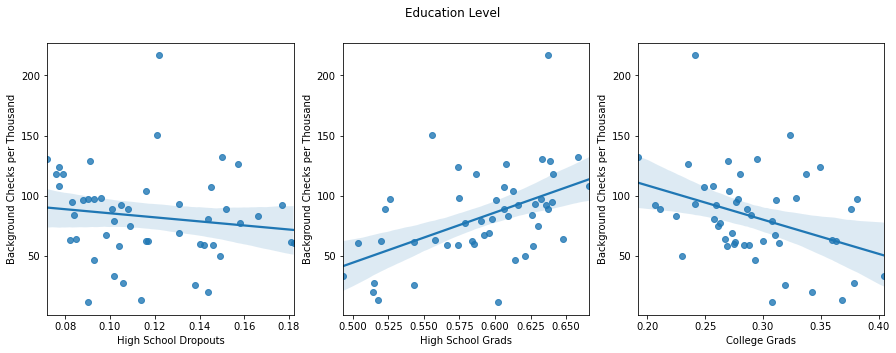

In [40]:
#Education
plt.figure(figsize = (15,5))

plt.subplot(131)
sns.regplot(x = 'no_HS', y = 'bc_per_thou_2016', data = reduced_df)
plt.xlabel('High School Dropouts')
plt.ylabel('Background Checks per Thousand')

plt.subplot(132)
sns.regplot(x = 'HS_grad', y = 'bc_per_thou_2016', data = reduced_df)
plt.xlabel('High School Grads')
plt.ylabel('Background Checks per Thousand')

plt.subplot(133)
sns.regplot(x = 'col_grad', y = 'bc_per_thou_2016', data = reduced_df)
plt.xlabel('College Grads')
plt.ylabel('Background Checks per Thousand')

plt.suptitle('Education Level')
plt.show()

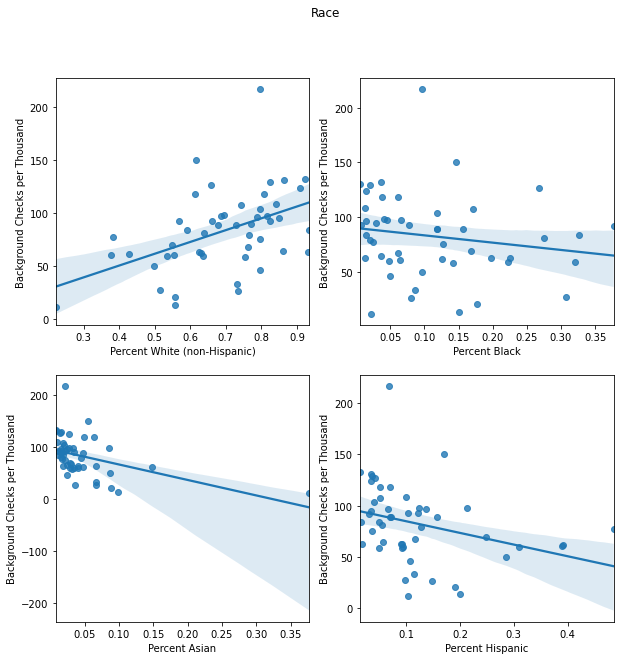

In [41]:
#Race
plt.figure(figsize = (10,10))

plt.subplot(221)
sns.regplot(x = 'white_non_hisp', y = 'bc_per_thou_2016', data = reduced_df)
plt.xlabel('Percent White (non-Hispanic)')
plt.ylabel('Background Checks per Thousand')

plt.subplot(222)
sns.regplot(x = 'black', y = 'bc_per_thou_2016', data = reduced_df)
plt.xlabel('Percent Black')
plt.ylabel('Background Checks per Thousand')

plt.subplot(223)
sns.regplot(x = 'asian', y = 'bc_per_thou_2016', data = reduced_df)
plt.xlabel('Percent Asian')
plt.ylabel('Background Checks per Thousand')

plt.subplot(224)
sns.regplot(x = 'hisp', y = 'bc_per_thou_2016', data = reduced_df)
plt.xlabel('Percent Hispanic')
plt.ylabel('Background Checks per Thousand')

plt.suptitle('Race')
plt.show()

It appears that my pervious conclusions are still accurate. It is actually easier to see without the outlier because with the larger scale, the lines appear flatter.

<a id='conclusions'></a>
## Conclusions

For the United States, gun related background checks are increasing at a much higher rate than the population; a mean change of 86% for background checks and a mean change of 4% for the population. This is just a snap shot of two years of data, more information would be needed for the full picture.

The higher per capita background checks appear to be in states with less population density, lower college graduation rates, and a higher percentage of white people. Again, this is just a one year snap shot so these conclusions should be taken with a grain of salt.

This should be taken as just an initial look at the data. There are many other areas that can be looked at this this data. For instance, the lower population density has more background checks, but is this long barrel guns or hand guns?

